# INF-495, v0.01, Claudio Torres, ctorres@inf.utfsm.cl. DI-UTFSM
## Textbook: Computational Mathematical Modeling, An Integrated Approach Across Scales by Daniela Calvetti and Erkki Somersalo.

In [30]:
import numpy as np
import scipy.sparse.linalg as sp
import sympy as sym
from scipy.linalg import toeplitz

import ipywidgets as widgets
from ipywidgets import IntSlider

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

plt.style.use('ggplot')

import matplotlib as mpl
mpl.rcParams['font.size'] = 14
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
sym.init_printing()



from scipy.integrate import odeint
from ipywidgets import interact

## Hints:
I strongly suggest to review the following jupyter notebook:
- [Intro to ODE] https://github.com/tclaudioe/Scientific-Computing/blob/master/SC2/U3_ODE.ipynb

## 1.2 Ordinary differential equations

A differenetial equation, in this case a scalar initial value problem (IVP), can be defined as follows:
\begin{align*}
\dfrac{\mathrm{d}x}{\mathrm{d}t}(t) &= f(t,x(t)),\\
x(0) &= x_0.
\end{align*}
For a known function $f(t,x)$ and $x_0$. 
Particularly one could integrate both sides of the first equation as follows,
\begin{align*}
\int_0^{h} \dfrac{\mathrm{d}x}{\mathrm{d}t}(t)\mathrm{d}t & = \int_0^{h} f(t,x(t))\,\mathrm{d}t,\\
x(h)-x(0) &= \int_0^{h} f(t,x(t))\,\mathrm{d}t,
\end{align*}
where the Fundamental Theorem of Calculus was used.
Now, we solve for the unknow value $x(h)$:
\begin{align*}
x(h) &= x(0) + \int_0^{h} f(t,x(t))\,\mathrm{d}t.
\end{align*}
Up to this point, we have not made any approximation.
From this point, one can derive several numerical method, depending how you approximate the integral. 
For instance, if we consider $h=\Delta t$ and we use a Reimann sum from the left (only one interval from $0$ to $\Delta t$), we obtain the method called Forward Euler.
But if we do the same but with the Reimann sum from the right, we obtain backward Euler.
Another two options that are easy to see are the midpoint rule and the trapezoidal rule.
Notice that in some cases mentioned, you would need a non-linear equation (or a system in higher dimension) for each time step.

### Example 1

Considers the following IVP:
\begin{align*}
\dfrac{\mathrm{d}x}{\mathrm{d}t}(t) &= -\alpha\,x,\\
x(0) &= x_0,
\end{align*}
for which we know the solution:
\begin{align*}
x(t) &= x_0\,\exp(-\alpha\,t)
\end{align*}

In [31]:
# Warning: In general, we will use \dot{y}=f(t,y), y(0)=y_0, 
# so don't get mixed up with the notation from the textbook.

def f_example_1_interact(alpha_input=1,T_max=5,p=2):
    # Example 1, numerically.
    def f_example_1(t,y, alpha):
        return -alpha*y

    # Initial condition
    y0=1
    # time where we want your solution
    t = np.linspace(0, T_max, 100)

    sol = odeint(f_example_1, y0, t, args=(alpha_input,), tfirst=True)

    plt.figure()
    plt.plot(t, sol, 'b', label='y(t)')
    for i in np.arange(1,np.ceil(T_max/(np.log(p)/alpha_input))):
        plt.axvline(x=i*np.log(p)/alpha_input)
        print('t: ',i*np.log(p)/alpha_input,', exp(t): ',np.exp(-alpha_input*i*np.log(p)/alpha_input))
    plt.legend(loc='best')
    plt.xlabel('t')
    plt.ylabel(r'$\exp(-\alpha\,t)$')
    plt.title('What are the red lines?')
    plt.grid(True)
    plt.show()
interact(f_example_1_interact,alpha_input=(0.1,10,0.1),T_max=(0.1,100,0.1),p=(2,10,1))

interactive(children=(FloatSlider(value=1.0, description='alpha_input', max=10.0, min=0.1), FloatSlider(value=…

<function __main__.f_example_1_interact(alpha_input=1, T_max=5, p=2)>

### Example 2

Considers the following IVP:
\begin{align*}
\dfrac{\mathrm{d}x}{\mathrm{d}t}(t) &= \sqrt{x}\\
x(0) &= 0,
\end{align*}

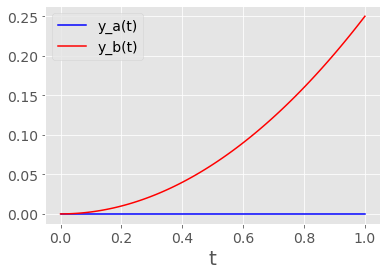

In [32]:
# Example 2, numerically.
def f_example_2(t,y):
    return np.sqrt(y)

# Initial condition
y0=0
# time where we want your solution
t = np.linspace(0, 1, 100)
sol_a = odeint(f_example_2, y0, t, tfirst=True)
sol_b = odeint(f_example_2, y0+2**-1074, t, tfirst=True)

plt.figure()
plt.plot(t, sol_a, 'b', label='y_a(t)')
plt.plot(t, sol_b, 'r', label='y_b(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid(True)
plt.show()

### Example 3

Considers the following IVP:
\begin{align*}
\dfrac{\mathrm{d}x}{\mathrm{d}t}(t) &= x^2\\
x(0) &= 1,
\end{align*}
for which we know the solution:
\begin{align*}
x(t) &= \dfrac{1}{1-t}
\end{align*}

In [33]:
def f_example_3_interact(T_max=0.5):
    # Example 3, numerically.
    def f_example_3(t,y):
        return y*y

    # Initial condition
    y0=1
    # time where we want your solution
    t = np.linspace(0, T_max, 100)
    sol = odeint(f_example_3, y0, t, tfirst=True)

    plt.figure()
    plt.plot(t, sol, 'b', label='y(t)')
    plt.legend(loc='best')
    plt.xlabel('t')
    plt.grid(True)
    plt.show()
interact(f_example_3_interact,T_max=(0.1,1,0.001))

interactive(children=(FloatSlider(value=0.5, description='T_max', max=1.0, min=0.1, step=0.001), Output()), _d…

<function __main__.f_example_3_interact(T_max=0.5)>

### Example 4

See classnotes!

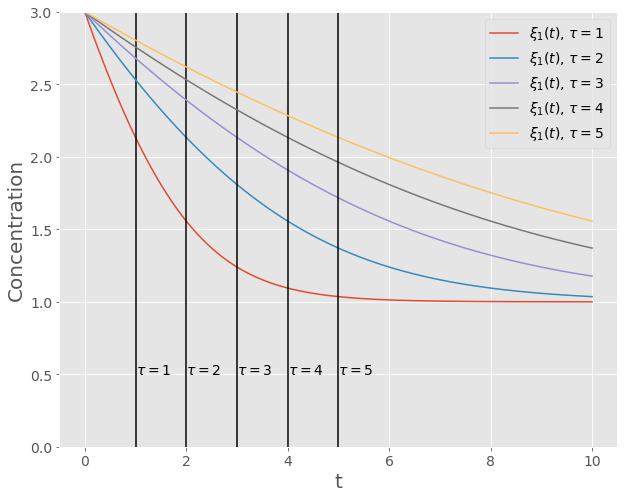

In [49]:
def f_example_4(t,y,alpha):
    return alpha*(1/2-y/(1+y))

# Initial condition
y0=3
# time where we want your solution
t = np.linspace(0, 10, 100)

plt.figure(figsize=(10,8))
for j in np.arange(1,6):
    sol= odeint(f_example_4, y0, t, args=(4/j,), tfirst=True)
    plt.plot(t, sol, label=r'$\xi_1(t)$'+r', $\tau= $'+str(j))
    plt.axvline(x=j,color='k')
    plt.text(j,0.5,r'$\tau= $'+str(j))
plt.legend(loc='best')
plt.ylabel('Concentration')
plt.xlabel('t')
plt.ylim((0,3))
plt.grid(True)
plt.show()

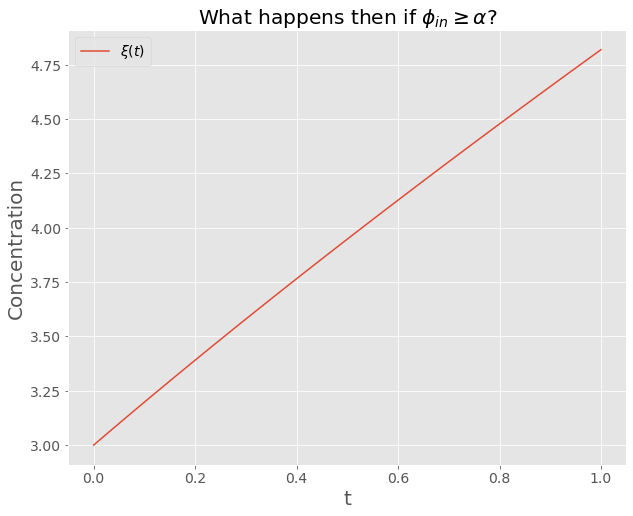

In [50]:
def f_example_4b(t,y,alpha,phi_in):
    return phi_in-alpha*(y/(1+y))

# Initial condition
y0=3
# time where we want your solution
t = np.linspace(0, 1, 100)

plt.figure(figsize=(10,8))
sol= odeint(f_example_4b, y0, t, args=(4,5), tfirst=True)
plt.plot(t, sol, label=r'$\xi(t)$')
plt.legend(loc='best')
plt.ylabel('Concentration')
plt.xlabel('t')
plt.title(r'What happens then if $\phi_{in}\geq\alpha$?')
plt.grid(True)
plt.show()

### Example 7, for completeness.

Plotting:
\begin{align*}
f(t) &= \dfrac{t^2}{\pi^2+t^2}\,\sin(5\,t),\quad 0 \leq t \leq 4\,\pi
\end{align*}

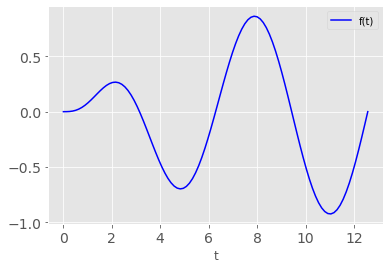

In [5]:
t = np.linspace(0,4*np.pi,100)

f = lambda t: (t**2/(np.pi**2+t**2))*np.sin(t)

plt.figure()
plt.plot(t,f(t),'b-',label='f(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid(True)
plt.show()

### Example 8, for completeness.

Plotting:
\begin{align*}
f(t,\tau) &= \exp(-t/\tau)\,\sin(2\,\pi\,t),\quad 0 \leq t \leq 2.
\end{align*}

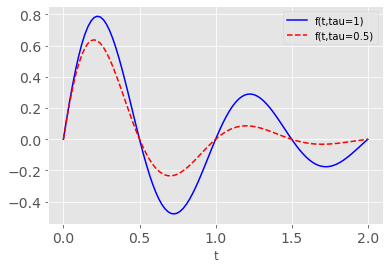

In [6]:
t = np.linspace(0,2,100)

f = lambda t,tau: np.exp(-t/tau)*np.sin(2*np.pi*t)

plt.figure()
plt.plot(t,f(t,1),'b-',label='f(t,tau=1)')
plt.plot(t,f(t,0.5),'r--',label='f(t,tau=0.5)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid(True)
plt.show()

### Example 9, for completeness.

Plotting:
\begin{align*}
f(t,u) &= u^2\,\dfrac{t}{1+t},\quad 0 \leq t, u \in \mathbb{R}.
\end{align*}

In [7]:
elev_widget = IntSlider(min=0, max=180, step=10, value=40)
azim_widget = IntSlider(min=0, max=360, step=10, value=230)

def example_9_interact(elev=40,azim=230):
    f = lambda t,u: (u**2)*(t/(1+t))

    nt, nu = (100, 50)
    t = np.linspace(0, 5, nt)
    u = np.linspace(-1, 1, nu)
    tt, uu = np.meshgrid(t, u)
    zz = f(tt,uu)

    fig = plt.figure(figsize=(10,10))
    ax  = fig.gca(projection='3d')

    # h = plt.contourf(tt,uu,zz)
    surf = ax.plot_surface(tt,uu,zz, cmap=cm.coolwarm, linewidth=0, antialiased=False)
    ax.view_init(elev,azim)
    ax.set_xlabel('t')
    ax.set_ylabel('u')
    ax.set_zlabel('f')
    #plt.colorbar()
    plt.grid(True)
    plt.show()
interact(example_9_interact,elev=elev_widget,azim=azim_widget)

interactive(children=(IntSlider(value=40, description='elev', max=180, step=10), IntSlider(value=230, descript…

<function __main__.example_9_interact(elev=40, azim=230)>

### Example 10, for completeness.

\begin{equation*}
f(t)=
\begin{cases}
t\,\sin(t), & 0\leq t < 2, \\
\dfrac{\sin(\pi\,t)}{t}, & 2 < t.
\end{cases}
\end{equation*}

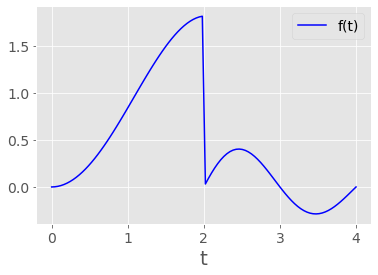

In [60]:
t = np.linspace(0,4,100)

f = lambda t: (t**2/(np.pi**2+t**2))*np.sin(t)

def f(t):
    if t<=2:
        return t*np.sin(t)
    else:
        return np.sin(np.pi*t)/t
    
fv=np.vectorize(f,otypes=[np.float64])

plt.figure()
plt.plot(t,fv(t),'b-',label='f(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid(True)
plt.show()

### Example 11, for completeness.

Write a function that return $f(t)=\exp(-\alpha\,t^2)$ and $f'(t)=-2\,\alpha\,t\,\exp(-\alpha\,t^2)$.

In [61]:
def f_and_fprime(t,alpha):
    f = lambda t: np.exp(-alpha*t**2)
    fp = lambda t: -2*alpha*t*f(t)
    return np.array([f(t),fp(t)])

print(f_and_fprime(t=1,alpha=1))

[ 0.36787944 -0.73575888]


## Homework

- Plot the output of Example 11.
- Example 12, 13 and 14.
- Solve numerically the following problem and plot the solution:
Let $y_1(t)$ be the number of rabbits at time $t$ and $y_2(t)$ be the number of foxes at time $t$.
Consider they are in an isolated island and the rabiits have unlimited grass to eat and the foxes eat rabbits. 
So, if there are not foxes, the population will grow without limits, this meains, $\dot{y1}(t)=y_1(t)$, this means the numbers of rabbits grow exponentially.
Now, if there are not rabbiots, we have $\dot{y_2}(t)=-y_2(t)$, since the population of foxes will decay without food. but, how do the two population could interact?

\begin{align*}
\dot{y_1}(t)&=(1-y_2(t)/\mu_2)\,y_1(t)\\
\dot{y_2}(t)&=-(1-y_1(t)/\mu_1)\,y_2(t)\\
y_1(0)&=400\\
y_2(0)&=100
\end{align*}

donde $\mu_1=300$ y $\mu_2=200$ son constantes de normalización.